Start

In [1]:
# https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

![](https://miro.medium.com/max/1400/1%2ABiVCmiQtCBIdBNcaOKjurg.png)

<center>A high level standard workflow for any NLP project</center>

> ## Data Scrapting

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]  # news_category = technology first
        data = requests.get(url) # gets the responce from the link
        soup = BeautifulSoup(data.content, 'html.parser') # now soup contains the entire HTML of the given link
        
        
        # Heading and article will be fetched by search in the html
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
        for headline, article in 
            zip(soup.find_all('div', 
                            class_=["news-card-title news-right-box"]),
                soup.find_all('div', 
                            class_=["news-card-content news-right-box"]))
]
        news_data.extend(news_articles)
        
    
        
    df =  pd.DataFrame(news_data)
    # df = df[['news_headline', 'news_article', 'news_category']]
    return df 

In [5]:
news_df = build_dataset(seed_urls)
news_df.sample(10)

,news_headline,news_article,news_category
49,US First Lady Jill Biden makes surprise visit ...,US First Lady Jill Biden made a surprise visit...,world
69,Saudi King Salman hospitalised in Jeddah for m...,Saudi Arabia's King Salman bin Abdulaziz was a...,world
28,"Pic of MS Dhoni 'eating' his bat goes viral, A...",A picture of MS Dhoni using his teeth on his b...,sports
31,Injected Rizwan with prohibited substance for ...,Pakistan cricket team doctor Najeebullah Soomr...,sports
37,"SRH won 5 games in a row, I don't know why the...",After SRH suffered their fourth straight defea...,sports
42,Umran Malik shouldn't compromise on bowling fa...,Ex-India cricketer Nikhil Chopra said SRH's Um...,sports
6,"Bled through my pants, couldn't get a tampon d...",A former employee at TikTok claimed that she b...,technology
29,How can KKR still qualify for IPL 2022 playoffs?,KKR are ninth on IPL 2022 points table with ei...,sports
16,Twitter CEO's wife is General Partner at VC fi...,Twitter CEO Parag Agrawal's wife Vineeta Agarw...,technology
56,"Roller coaster gets stuck mid-ride, riders lef...",A roller coaster ride at an amusement park in ...,world


In [6]:
news_df.describe(include ='all')

,news_headline,news_article,news_category
count,74,74,74
unique,73,73,3
top,"If I die under mysterious circumstances, nice ...","Tesla CEO Elon Musk has tweeted, ""If I die und...",sports
freq,2,2,25


In [7]:
news_df.news_category.value_counts()

sports        25
world         25
technology    24
Name: news_category, dtype: int64

In [8]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata
# nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
nlp = spacy.load('en_core_web_sm')
# #nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [10]:
# !pip install -U nltk

In [11]:
# !pip install spacy

In [12]:
# import nltk
# nltk.download()

In [13]:
# !pip install -U contractions

In [9]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [10]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [16]:
# def expand_contractions(text, contraction_mapping=contractions_dict):
    
#     contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
#                                       flags=re.IGNORECASE|re.DOTALL)
#     def expand_match(contraction):
#         match = contraction.group(0)
#         first_char = match[0]
#         expanded_contraction = contraction_mapping.get(match)\
#                                 if contraction_mapping.get(match)\
#                                 else contraction_mapping.get(match.lower())                       
#         expanded_contraction = first_char+expanded_contraction[1:]
#         return expanded_contraction
        
#     expanded_text = contractions_pattern.sub(expand_match, text)
#     expanded_text = re.sub("'", "", expanded_text)
#     return expanded_text


# def expand_contractions(text, contraction_mapping=contractions_dict):
#     contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
#                                     flags=re.IGNORECASE | re.DOTALL)

#     def expand_match(contraction):
#         match = contraction.group(0)
#         first_char = match[0]
#         expanded_contraction = contraction_mapping.get(match) \
#             if contraction_mapping.get(match) \
#             else contraction_mapping.get(match.lower())
#         expanded_contraction = first_char + expanded_contraction[1:]
#         return expanded_contraction


#     try:
#         expanded_text = contractions_pattern.sub(expand_match, text)
#         expanded_text = re.sub("'", "", expanded_text)
#     except:
#     return text
# return expanded_text


# expand_contractions("Y'all can't expand contractions I'd think")
# type(news_df['full_text'][0])
# news_df['full_text'][1]

# expand_contractions('''Tesla loses $126 billion in value amid Musk Twitter deal funding concerns. Tesla lost $126 billion in value amid investor concerns that CEO Elon Musk may have to sell shares to fund his $21 billion equity contribution to his $44 billion buyout of Twitter. Tesla isn't involved in Twitter deal, however its shares have been targeted by speculators after Musk declined to disclose where his cash for the acquisition is coming from.''')


In [20]:
from contractions import contractions_dict
def expand_contractions(text,contraction_mapping=contractions_dict):
    contractions_pattern=re.compile('({})'.format('|'.join
                                      (contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match=contraction.group(0)
        first_char=match[0]
        expanded_contraction=contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction=first_char+expanded_contraction[1:]
        return expanded_contraction   
    
    
    try:                   
        expanded_text=contractions_pattern.sub(expand_match,str(text))
        expanded_text=re.sub("'"," ",expanded_text)
    except:
        return text
    return expanded_text

print(expand_contractions("I'll be a FATHER"))
print(expand_contractions("He'll come"))
print(expand_contractions("I'll be a daughter"))

I will be a FATHER
He will come
I'll be a daughter


In [21]:

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [22]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

In [23]:

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crash yesterday , ours crash daily'

In [24]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [25]:
# Bringing it all together — Building a Text Normalizer

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        # if contraction_expansion:  # Manually commented
        #     doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus


In [25]:
# news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

# news_df['full_text'][0]

In [26]:
# clean = expand_contractions(news_df['full_text'][0])


In [26]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]
# news_df['full_text'][1]
# # pre-process text and store the same
# news_df['clean_text'] = normalize_corpus(news_df['full_text'])
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

# # show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Amazon driver leaves \'kind\' message for girl fighting cancer in US, Bezos reacts. Amazon Founder Jeff Bezos took to Instagram Stories to share the story of Amazon driver Asani Anderson who left a message for an 8-year-old girl battling cancer in US while dropping off packages. "Amazon is praying 4 Aubrey luv you!" the message by Anderson read. Reacting to the gesture, Bezos wrote on Instagram, "Kindness makes our world better...Anderson embodies it."',
 'clean_text': 'amazon driver leave kind message girl fighting cancer bezos react amazon founder jeff bezos take instagram story share story amazon driver asani anderson leave message year old girl battle cancer drop package amazon pray aubrey luv message anderson read react gesture bezos write instagram kindness make world well anderson embody'}

In [28]:
news_df.to_csv('news2.csv', index=False, encoding='utf-8')

### Parts of Speech Tagging(POS)

In [27]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Amazon,NNP
1,driver,NN
2,leaves,VBZ
3,'kind',POS
4,message,NN
5,for,IN
6,girl,JJ
7,fighting,VBG
8,cancer,NN
9,in,IN


![](https://miro.medium.com/max/962/1%2AnuaHAth4a4GFQi6yOfuf-g.png)

In [30]:
sentence2 = 'The brown fox is quick and he is jumping over the lazy dog'
sentence2_nlp = nlp(sentence2)
sentence2_nlp

spacy_pos_tagged2 = [(word, word.tag_, word.pos_) for word in sentence2_nlp]
pd.DataFrame(spacy_pos_tagged2, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged2 = nltk.pos_tag(sentence2.split())
pd.DataFrame(nltk_pos_tagged2, columns=['Word', 'POS tag'])

,Word,POS tag
0,The,DT
1,brown,JJ
2,fox,NN
3,is,VBZ
4,quick,JJ
5,and,CC
6,he,PRP
7,is,VBZ
8,jumping,VBG
9,over,IN


In [30]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [31]:

from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [32]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [33]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

# define the chunker class
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [34]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP Tesla/NNP)
  (VP loses/VBZ)
  (NP $126/CD billion/CD)
  (PP in/IN)
  (NP value/NN)
  (PP amid/IN)
  (NP Musk/NNP Twitter/NNP deal/NN funding/NN concerns/NNS))


In [35]:
# https://ghostscript.com/releases/gsdnld.html

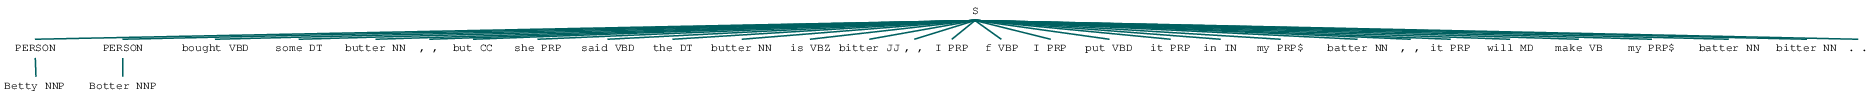

In [36]:
import os
from nltk import word_tokenize, pos_tag, ne_chunk
path_to_gs = "C:\Program Files\gs\gs9.56.1\bin" #change the dir
os.environ['PATH'] += os.pathsep + path_to_gs
sent = "Betty Botter bought some butter, but she said the butter is  bitter, I f I put it in my batter, it will make my batter bitter."
entities = ne_chunk(pos_tag(word_tokenize(sent)))
entities

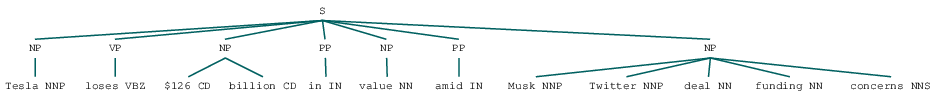

In [37]:
from IPython.display import display

## download and install ghostscript from https://www.ghostscript.com/download/gsdnld.html

# often need to add to the path manually (for windows)
os.environ['PATH'] = os.environ['PATH']+";C:\\Program Files\\gs\\gs9.09\\bin\\"

display(chunk_tree)

In [41]:

# # set java path


# import os
# java_path = r'C:\Program Files\Java\jdk1.8.0_102\bin\java.exe'
# os.environ['JAVAHOME'] = java_path

# # from nltk.parse.stanford import StanfordParser
# from nltk.parse.corenlp import CoreNLPServer

# scp = CoreNLPServer(path_to_jar='"E:/RNN/NLP/stanford-ner-2014-08-27/stanford-ner-3.4.1.jar"',
#                      path_to_models_jar='"E:/RNN/NLP/stanford-ner-2014-08-27/stanford-ner-3.4.1-javadoc.jar"')
                   
# result = list(scp.raw_parse(sentence))
# print(result[0])

In [42]:
# from IPython.display import display
# display(result[0])

In [43]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))


[]<---Tesla[nsubj]--->[]
--------
['Tesla']<---loses[ROOT]--->['billion', 'amid']
--------
[]<---$[quantmod]--->[]
--------
[]<---126[compound]--->[]
--------
['$', '126']<---billion[dobj]--->['in']
--------
[]<---in[prep]--->['value']
--------
[]<---value[pobj]--->[]
--------
[]<---amid[prep]--->['concerns']
--------
[]<---Musk[compound]--->[]
--------
['Musk']<---Twitter[compound]--->[]
--------
['Twitter']<---deal[compound]--->[]
--------
[]<---funding[compound]--->[]
--------
['deal', 'funding']<---concerns[pobj]--->[]
--------


In [44]:

from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [52]:
!pip install stanfordcorenlp


In [51]:
import nltk
import os
java_path = "C:\\Program Files\\Java\\jre1.8.0_51\\bin\\java.exe" 
os.environ['JAVAHOME'] = java_path


from nltk.parse import stanford
os.environ['STANFORD_PARSER'] = 'path/jar'
os.environ['STANFORD_MODELS'] = 'path/jar'
parser = stanford.StanfordDependencyParser(model_path="path/jar/englishPCFG.ser.gz")

sentences = parser.raw_parse_sents(nltk.sent_tokenize("The iPod is expensive but pretty."))

C:\Users\Dan\AppData\Local\Temp/ipykernel_14140/2366389885.py:10: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = stanford.StanfordDependencyParser(model_path="path/jar/englishPCFG.ser.gz")


LookupError: 

===========================================================================
  NLTK was unable to find stanford-parser\.jar! Set the CLASSPATH
  environment variable.

  For more information, on stanford-parser\.jar, see:
    <https://nlp.stanford.edu/software/lex-parser.shtml>
===========================================================================

In [46]:
from nltk.parse.stanford import StanfordDependencyParser
# sdp = StanfordDependencyParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
#                                path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')    

result = list(sdp.raw_parse(sentence))  

# print the dependency tree
dep_tree = [parse.tree() for parse in result][0]
print(dep_tree)

# visualize raw dependency tree
from IPython.display import display
display(dep_tree)

# visualize annotated dependency tree (needs graphviz)
from graphviz import Source
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree", format="png")
source

NameError: name 'sdp' is not defined

In [47]:
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[($, 'MONEY'), (126, 'MONEY'), (billion, 'MONEY'), (Musk, 'PERSON'), (Twitter, 'PERSON'), ($, 'MONEY'), (126, 'MONEY'), (billion, 'MONEY'), (Elon, 'PERSON'), (Musk, 'PERSON'), ($, 'MONEY'), (21, 'MONEY'), (billion, 'MONEY'), ($, 'MONEY'), (44, 'MONEY'), (billion, 'MONEY'), (Twitter, 'PRODUCT'), (Twitter, 'PRODUCT'), (Musk, 'PERSON')]


In [48]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])


In [49]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,Russia,Twitter,Musk,Ukraine,RCB,Elon Musk,Russian,India,US,UN,Wednesday,two,$ 44 billion,Denmark,Twitter $ 44 billion
Entity Type,GPE,PRODUCT,PERSON,GPE,ORG,PERSON,NORP,GPE,GPE,ORG,DATE,CARDINAL,MONEY,GPE,MONEY
Frequency,26,20,18,11,8,8,8,7,6,5,5,5,5,4,4


In [50]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,GPE,ORG,CARDINAL,DATE,NORP,MONEY,PRODUCT,PERCENT,ORDINAL,LOC,FAC,TIME,EVENT,QUANTITY
Frequency,175,122,118,69,44,41,31,24,8,7,6,2,2,1,1


In [ ]:
from nltk.tag import StanfordNERTagger
import os

# set java path
java_path = r'C:\Program Files\Java\jdk1.8.0_102\bin\java.exe'
os.environ['JAVAHOME'] = java_path

# initialize NER tagger
sn = StanfordNERTagger('E:/stanford/stanford-ner-2014-08-27/classifiers/english.all.3class.distsim.crf.ser.gz',
                       path_to_jar='E:/stanford/stanford-ner-2014-08-27/stanford-ner.jar')

# tag named entities
ner_tagged_sentences = [sn.tag(sent.split()) for sent in corpus]

# extract all named entities
named_entities = []
for sentence in ner_tagged_sentences:
    temp_entity_name = ''
    temp_named_entity = None
    for term, tag in sentence:
        if tag != 'O':
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

#named_entities = list(set(named_entities))
entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
                            

# view top entities and types
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head(15)


# view top entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head()

In [ ]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

In [ ]:
!pip install -U afinn

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

In [ ]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [ ]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 6)].index[0]
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -15)].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

In [ ]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 16)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -12)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

In [ ]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

In [ ]:
!pip install -U textblob

In [ ]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [ ]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

In [ ]:
!pip install -U model_evaluation_utils